# Linear Regression with Scikit-Learn and Statsmodels

<img src="https://avatars2.githubusercontent.com/u/365630?v=3&s=400" style="width: 300px; float: left; margin: 20px; margin-top: -20px; break: right;"><img src="https://snag.gy/qfaubJ.jpg" style="width: 300px; float: left; margin: 20px;"> 

<br clear="all">

# 1.3: Intro to Sklearn + Statsmodels

In today's codealong, we will be exploring the fundamental cases that primarily showcase Sklearn's strengths with modeling and machine learning as part of the anlaysis pipeline.

**Even with all the power provided by our modeling toolsets, don't forget it's not a replacement for good EDA.**

### Objectives

- Preparing data to use with modeling
- Fitting vs Predicting
- Model evaluation basics


#### Caveats

Starting down the path of modeling as part of anlaysis, it's difficult to know what's "correct" or what is "wrong".  The main challenge to understand is how your model will react in a variety of curcumstances to get where it works well, or where it falls short.  Mainly we want to be careful of how bias and variance in our data when conveying quality during analysis.  To understand the nuances around these concepts, it's essentail that you practice modeling a variety of datasets.

The biggest problem you will encounter in the begininng of learning how to model, will be understanding why a metric is good or bad, what doesn a metric mean, and what to do about it.  We will approach modeling with an emphasis on using the tools, and gradually explore a variety of datasets with our tools to understand the grey area that modeling unravels.

*This is where exploring datasets on your own is essentail and highly recommended.*

## Scikit + Statsmodels Documentation

We'll use two different packages and you can see examples for linear regression of each:
* statsmodels -- [linear regression](http://statsmodels.sourceforge.net/devel/examples/#regression)
* scikit-learn -- [linear regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

If you haven't yet, you may want to familliarize yourself with the format of the documentation.  We might take a quick look in class to talk a bit about the format of documentation to get a sense about how they are structured.

## Background: Scikit-learn / sklearn

<img src="https://avatars1.githubusercontent.com/u/25111?v=3&s=200" style="float: left; margin: 0 25px;"> Scikit-learn was founded in 2007 as a Google summer of code project by [David Cournapeau](https://github.com/cournape).  Later in 2007, Matthieu Brucher published his thesis on Scikit-learn.  Since then, the Scikit-learn project has taken on a team of owners, of which are based worldwide. A great high level overview can be found in a 2011 publication in [Journal of Machine Learning Research 12 (2011) 2825-2830](http://www.jmlr.org/papers/volume12/pedregosa11a/pedregosa11a.pdf).

Skikit-learn is part of the Scipy family of "kits".  Explore some of the [other projects](https://scikits.appspot.com/scikits) in this family.
<br clear="all"><br>
Scikit-learn provides a wide variety of machine learning opportunities including:

- Linear regression
- Logistic regression
- Support Vector Machines
- Classification And Regression Tree Models
- Naive Bayes
- Clustering Models (K-Means, Hierarchical, DBScan)

Also handling typical machine learning pipeline utilities for:
- Model evaluation
- Model selection
- Preprocessing
- Natural Language Processing
- Dimensionality Reduction

Lastly, Scikit-learn comes with a ton of datasets that are formatted nicely to work with models provided within their library.
- Boston Housing
- Iris Flowers
- Diabetes Diagnostics
- Various sample images (for classification)
  - Faces
  - MINIST (handwriting examples)
- Random data generators
- Spam examples
- Newsgroup classfication

[Read more about Scikit-learn datasets](http://scikit-learn.org/stable/datasets/)

### Under the Hood

- **Numpy**:  The base data structure used for data and model parameters. Input data is presented as numpy arrays, thus integrating seamlessly with other scientific Python libraries. Numpy’s viewbased memory model limits copies, even when binding with compiled code.  It also provides basic arithmetic operations.<br><br>

- **Scipy**:  Efficient algorithms for linear algebra, sparse matrix representation, special functions and basic statistical functions.<br><br>

- **Cython**:  A language for combining C in Python. Cython makes it easy to reach the performance of compiled languages with Python-like syntax and high-level operations.

## First Steps:  Scikit-learn

Scikit-learn is a machine learning package for python that includes a huge array of models including linear regression. Scikit-learn includes a number of sample data sets including the Boston housing data set. 

_You could also load the datasets with Pandas from the prior lessons and try all of this out.  _

_To get the most out of this class, consider working with datasets outside of class to get a better sense of how models work, but most importantly, how to use and evaluate them properly.  **Highly recommended!**_ 

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

data = datasets.load_boston()

print data.DESCR # This is like a data dictionary!

# Don't forget to turn on plotting display in the notebook
%matplotlib inline 

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Let's take a minute to see what the data looks like.

In [18]:
print data.feature_names
print data.data[0:3]
print data.target[0]

print data.target #What we are trying to predict

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[[  6.32000000e-03   1.80000000e+01   2.31000000e+00   0.00000000e+00
    5.38000000e-01   6.57500000e+00   6.52000000e+01   4.09000000e+00
    1.00000000e+00   2.96000000e+02   1.53000000e+01   3.96900000e+02
    4.98000000e+00]
 [  2.73100000e-02   0.00000000e+00   7.07000000e+00   0.00000000e+00
    4.69000000e-01   6.42100000e+00   7.89000000e+01   4.96710000e+00
    2.00000000e+00   2.42000000e+02   1.78000000e+01   3.96900000e+02
    9.14000000e+00]
 [  2.72900000e-02   0.00000000e+00   7.07000000e+00   0.00000000e+00
    4.69000000e-01   7.18500000e+00   6.11000000e+01   4.96710000e+00
    2.00000000e+00   2.42000000e+02   1.78000000e+01   3.92830000e+02
    4.03000000e+00]]
24.0
[ 24.   21.6  34.7  33.4  36.2  28.7  22.9  27.1  16.5  18.9  15.   18.9
  21.7  20.4  18.2  19.9  23.1  17.5  20.2  18.2  13.6  19.6  15.2  14.5
  15.6  13.9  16.6  14.8  18.4  21.   12.7  14.5  13.2  13.1  13.5  18.

### Pandas for Convenience

Our target is what we are predicting.  Also known as our **response variable**.

The data we train on is what we **fit**, to our model.  The variables we use within our training data are also known as our **predictor variables**.

Scikit-learn has already split our data into **predictors** (within training data), and **response** (target). Let's see how to build a linear regression. First let's put the data into a data frame for convenience, and do a quick check to see that everything loaded correctly.

In [19]:
import numpy as np
import pandas as pd

df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
targets = pd.DataFrame(data.target, columns=["MEDV"])

# Take a look at the first few rows
print df.shape
df.head()

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Our training set is a matrix / dataframe with many variables (**CRI, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B,** and **LSTAT**), containing **13** variables within **506** rows.

Our target is a series (in Pandas), that represents a single variable (**MEDV**), which is exactly the same length as our training set, **506**.

> _Training (fit) and target datasets must always match in length!_

In [20]:
# note the shape is (N, 1) where N is the length of your rows, and 1 is the dimension.
# You will run into errors if your target dimension is not (N, 1) for regression models
print targets.shape
targets.head()

(506, 1)


,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### Each Index Corresponds

For example:

Row 0 of **df** (our training set):
#### [0.00632	18.0	2.31	0.0	0.538	6.575	65.2	4.0900	1.0	296.0	15.3	396.90	4.98]

Cooresponds to the true value of our target, Row 0 **targets**:
#### 24.0

---
Row 3 of **df** (our training set):
#### [0.03237	0.0	2.18	0.0	0.458	6.998	45.8	6.0622	3.0	222.0	18.7	394.63	2.94]

Cooresponds to the true value of our target, Row 3 **targets**:
#### 33.4
---

These two seperate datasets (a matrix/dataframe, and a vector/series), are used to `.fit(training, response)`.  The training data is `n_samples x n_features`.  The response is a `single series x n_samples` matching the `n_samples` of the training data.

# Fitting our 1st Model!

Now let's fit a linear model to the data. First let's take a look at some of the variables we identified visually as being linked to house value, RM (we'll look at LSTAT later). Let's look at each individually and then both together.

_Note: If for some reason scikit-learn crashes the jupyter notebook, have conda remove mkl (there's an issue with the newer build on some systems)._

In [21]:
'''
Memorize basic theory statistics from 1.1 for job interviews
Memorize Linear and Logistic Regression formulas and what they mean



'''

'\nMemorize basic theory statistics from 1.1 for job interviews\nMemorize Linear and Logistic Regression formulas and what they mean\n\n\n\n'

0.483525455991


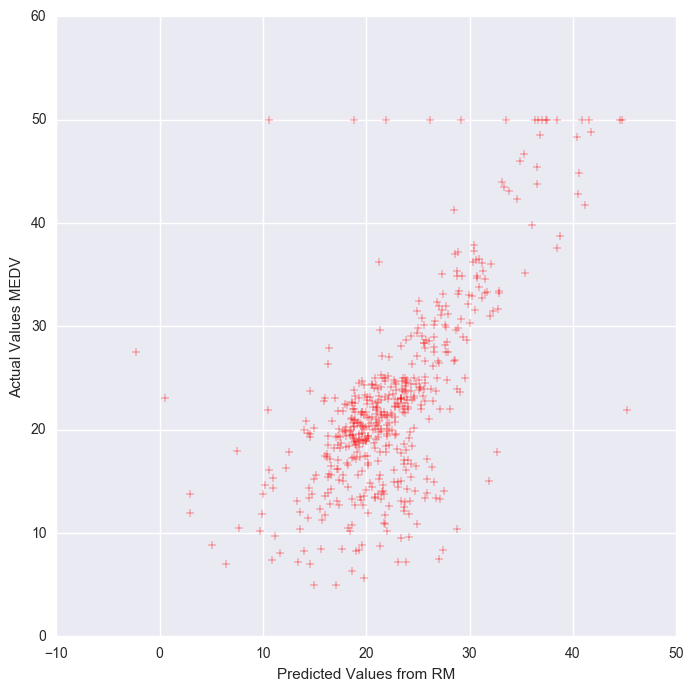

In [22]:
lm = linear_model.LinearRegression()

X = df[["RM"]]
y = targets["MEDV"]

model        =  lm.fit(X, y)
predictions  =  model.predict(X)
score        =  model.score(X, y)

print score

#Score = accuracy. How well is the model fit

# Plot the model
## s = s: size in points, c = color, zorder = layer order


plt.figure(figsize=(8,8))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM")
plt.ylabel("Actual Values MEDV")
plt.show()

**Check**: How does this plot relate to the model? In other words, how are the independent variables (RM, and LSTAT) and dependent variable ("MEDV") incorporated?

### R2, RMSE, Coeffients, and Predictions

After you run `.fit()` and `.predict()`, the parent scikit-learn object that handles your model, and the object returned from `.fit()`, contain important metrics.  

Incuding:

- **.coef_**: Class property containing the coeffients matching the training variables (predictors)
- **.score(X (matrix), y (target))**: Class method / function that returns the coefficient of determination R^2 of the prediction.  Found in many models in scikit-learn (but not all).


In [23]:
print "MSE: \n%f \n" % mean_squared_error(y, predictions)

# Alternatively, you can calulate MSE this way 
print "Residual sum of squares: \n%.2f \n" % (np.mean((predictions - y) ** 2))

print "Coefficients ('RM'): \n%s \n" % model.coef_

# R^2 (predictions vs actual target) - normalized measure of variance
# Can be negative, typically between 0 and 1.  Can be negative depending on predictions way out outside the range of your target / training.
# Sum of squares / residual sum of squares
# Or 1 - variance(residuals) / variance(y)
print "R^2 / Variance Explained Score (1 = perfect score): \n%f \n" % score

MSE: 
43.600552 

Residual sum of squares: 
43.60 

Coefficients ('RM'): 
[ 9.10210898] 

R^2 / Variance Explained Score (1 = perfect score): 
0.483525 



# Reviewing Familiar Evalutation Metrics

## **M**ean **S**quared **E**rror

$\operatorname{MSE}=\frac{1}{n}\sum_{i=1}^n(\hat{Y_i} - Y_i)^2$

Sum of squares from the predicted term $\hat{Y_i}$.  The smaller the means squared error, the better your model fits the data. 

## Coefficient of Determination  a.k.a. $R^2$ 

$R^2 = \frac{SS_\text{reg}}{SS_\text{tot}} = \frac{SS_\text{reg}/n}{SS_\text{tot}/n}$


#### Regression Sum of Squares 
_Explained sum of squares. **Model sum of squares** or **sum of squares due to regression**. The explained sum of squares measures how much variation there is in the **modelled values**. _

$SS_\text{reg}=\sum_i (\hat{y} -\bar{y})^2$

#### Total Sum of Squares
_Proportional to variance.  Essentially measured variance.  Sum of each point of $y_i$ to the mean of $y$, squared._

$SS_\text{tot} = \sum_i (y_i-\bar{y})^2$


$R^2$ is the most common metric we evaluate when looking at regression.  In Sklearn, the `.score()` method is a common function used to look at how well a model fits data.  Different models use a different method to "score" or calculate accuracy or quality.  `.score()` in sklearn doesn't always mean $R^2$, but you can count that being the case for provided regression methods.

$$R^2 = \frac{SS_\text{reg}}{SS_\text{tot}}$$



In [24]:
#MEMORIZE THE ABOVE THEORY

### Another Look at Prediction

At times, it's nice to have a consolidated dataframe containing your original dataset, target variable, and predicted response all in one place.

In [25]:
compared = X
compared.loc[:, 'Predicted MEDV (y_hat)'] = predictions
compared.loc[:, 'Actual MED (y)'] = y

compared.head(5)

/Users/austinwhaley/anaconda/envs/dsi/lib/python2.7/site-packages/pandas/core/indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/austinwhaley/anaconda/envs/dsi/lib/python2.7/site-packages/pandas/core/indexing.py:549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,RM,Predicted MEDV (y_hat),Actual MED (y)
0,6.575,25.175746,24.0
1,6.421,23.774021,21.6
2,7.185,30.728032,34.7
3,6.998,29.025938,33.4
4,7.147,30.382152,36.2


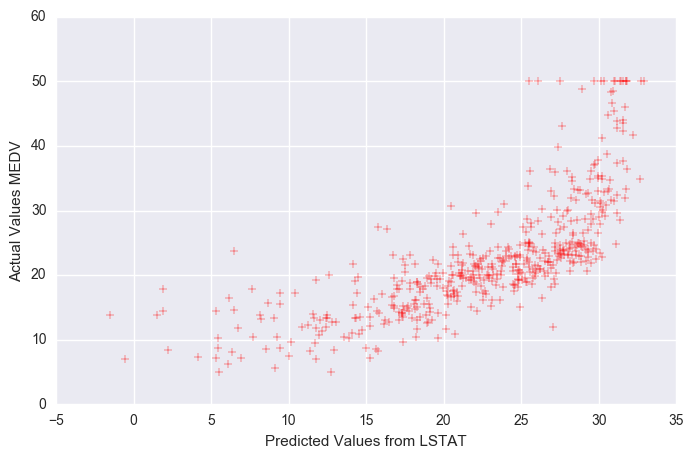

MSE: 
38.482967 

Coefficients ('RM'): 
[-0.95004935] 

R^2 / Variance Explained Score (1 = perfect score): 
0.483525 



In [26]:
# Here's the same pipeline, using a single variable LSTAT

lm = linear_model.LinearRegression()

X = df[["LSTAT"]]
y = targets["MEDV"]

model = lm.fit(X, y)
predictions = lm.predict(X)

# Plot the model
plt.figure(figsize=(8, 5))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from LSTAT")
plt.ylabel("Actual Values MEDV")
plt.show()

print "MSE: \n%f \n" % mean_squared_error(y, predictions)
print "Coefficients ('RM'): \n%s \n" % model.coef_

# R^2 (predictions vs actual target) - normalized measure of variance
# Can be negative, typically between 0 and 1.  Cam be negative depending on predictions way out outside the range of your target / training.
# Sum of squares / residual sum of squares
# Or 1 - variance(residuals) / variance(y)
print "R^2 / Variance Explained Score (1 = perfect score): \n%f \n" % score

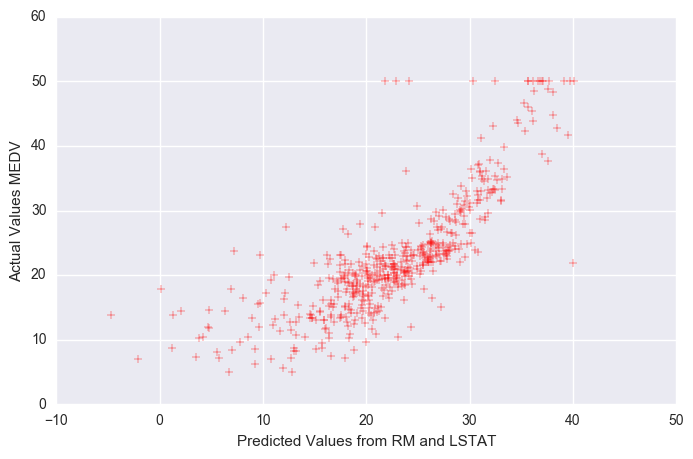

MSE: 30.5124687773


In [27]:
lm = linear_model.LinearRegression()

X = df[["RM", "LSTAT"]]
y = targets["MEDV"]

model = lm.fit(X, y)
predictions = model.predict(X)

# Plot the model
plt.figure(figsize=(8, 5))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM and LSTAT")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

## A quick note about negative $R^2$

_A negative R2 is possible based on the method used used (linear, polynomial, stepwise, etc). One method of producing R2 can only give positive numbers if it fits well to the regression method and data. Consequently, if the model is completely inappropriate, you can be left with a worse sum of squares than a flat line. While not common, is possible._ 

_A negative R2 means you are not on the right planet with your model, let alone in the ballpark. Either the data is complete nonsense or you should be useing a different type of function to fit (e.g. trying to fit a linear line to a complex polynomial shape).  Check those coefiecients._

## Comparing the models

A perfect fit would yield a straight line when we plot the predicted values versus the true values. We'll quantify the goodness of fit soon.

### Exercise

Run the fit on all the variables with `X = df`. Did this improve the fit versus the previously tested variable combinations? (Use mean squared error).

## Intro to Statsmodels

Now let's see how to use another popular package for regressions.

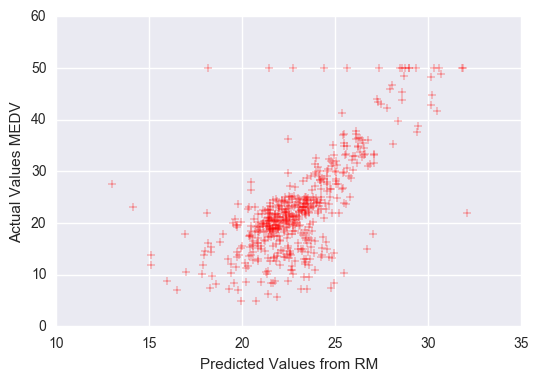

MSE: 58.4106354321


In [16]:
import statsmodels.api as sm

X = df["RM"]
y = targets["MEDV"]

# Note the difference in argument order
# optionally, you can chain "fit()" to the model object
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM")
plt.ylabel("Actual Values MEDV")
plt.show()

print "MSE:", mean_squared_error(y, predictions)

In [114]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     4615.
Date:                Mon, 08 Aug 2016   Prob (F-statistic):          3.74e-256
Time:                        13:21:26   Log-Likelihood:                -1747.1
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     505   BIC:                             3500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.000         3.548     3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

_The more variables that are added, the chance that one of the variables coorelates more with a given response.  Adj-R^2, controls / noramlizes your R^2 based on the number of samples._

## Guided Practice

Compare this to the analgous fit from scikit-learn above.

### Exercises

Recreate the model fits above with `statsmodels`:
* a model using LSTAT
* a model using RM and LSTAT
* a model using all the variables

Compare the mean squared errors for each model between the two packages. Do they differ significantly? Why or why not?

In [ ]:
# Start your exercises here

## Independent Practice

Using our preference of `scikit-learn` or `statsmodels`, try to find the best models that you can that:
* use only two variables
* only three variables
* only four variables

Evaluate your models using the squared error. Which has the lowest? How do the errors compare to using all the variables?

In [46]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='|S7')

MSE: 30.5124687773


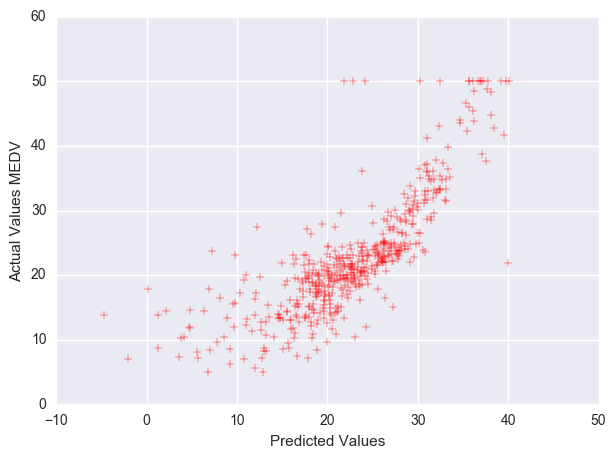

         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0     0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87   0.0  0.524  6.009   82.9  6.2267   

In [66]:
#Use Sklearn to solve the above problem

#Import packages
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

#load data
data = datasets.load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names) #Create dataframe of data from sklearn dataset
targets = pd.DataFrame(data.target, columns=["MEDV"])   # Put the target (housing value -- MEDV) in another DataFrame

# Put the target (housing value -- MEDV) in another DataFrame
targets = pd.DataFrame(data.target, columns=["MEDV"])

#Preprocess Data
#X = df
X = df[["RM", 'LSTAT']]         #Dataframe of all values in 'average number of rooms per dwelling' <- predictor
y = targets["MEDV"]    #array of values in our target category 'median values of homes in $1000's

#Create Model
lm = linear_model.LinearRegression()

#Application of our model
model        =  lm.fit(X, y)           #Create our model of the data
predictions  =  model.predict(X)       #Use our model to create predictions (Predictions based on X values)

#Evaluate Model
#score        =  model.score(X, y)      #A score of 1 would represent a perfect model
print "MSE:", mean_squared_error(y, predictions)
#Lower MSE is better

# Plot the model
plt.figure(figsize=(7, 5))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values MEDV")
plt.show()

'''
ALL VARIABLES = 21.90
RM-LSTAT = 30.51

'''

print df

# Bonus Exercises

From the LSTAT plot you may have noticed that the relationship is not quite linear. Add a new column `"LSTAT2"` to your data frame for the LSTAT values squared and try to fit a quadratic function using `["LSTAT", "LSTAT2"]`. Is the resulting fit better or worse?

In [ ]:
# Start your exercises here

### Using Formulas /w Statsmodels

We will walk through this after practice.  (ie: formula='Lottery ~ Literacy + Wealth + Region', data=df)